In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import re
     

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/xecyborg/sensor-data-analysis/main/HealthApp_2k.log_structured.csv")

In [7]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [9]:
df['Pid'].unique()

array([30002312], dtype=int64)

In [10]:
#Since this data involve only one person so there is no need for the Pid

In [11]:
df.drop(columns=['Pid','LineId'],inplace=True)

In [12]:
for col in df.columns:
    print(f'{col},:,{df[col].unique()}')
    print('------------------------------------------------------------------------------')

Time,:,['20171223-22:15:29:606' '20171223-22:15:29:615' '20171223-22:15:29:633'
 ... '20171224-1:0:0:794' '20171224-1:1:0:935' '20171224-1:2:35:789']
------------------------------------------------------------------------------
Component,:,['Step_LSC' 'Step_StandReportReceiver' 'Step_StandStepCounter'
 'Step_SPUtils' 'Step_ExtSDM' 'Step_ScreenUtil'
 'Step_FlushableStepDataCache' 'HiH_HiAppUtil' 'HiH_HiHealthBinder'
 'HiH_HiHealthDataInsertStore' 'HiH_DataStatManager' 'HiH_ListenerManager'
 'HiH_HiSyncControl' 'HiH_HiSyncUtil' 'HiH_' 'HiH_HiBroadcastUtil'
 'Step_StandStepDataManager' 'Step_DataCache' 'Step_HGNH'
 'Step_NotificationUtil']
------------------------------------------------------------------------------
Content,:,['onStandStepChanged 3579' 'onExtend:1514038530000 14 0 4'
 'onReceive action: android.intent.action.SCREEN_ON' ...
 ' getTodayTotalDetailSteps = 1514046240000##0##549659##8661##16256##34961757'
 'setTodayTotalDetailSteps=1514046420000##0##549659##8661##16256##3514

In [13]:
#The values in Content and EventTemplate columns are almost same,to reduce the complexity of the data we will drop the EventTemplate as it contains the values with are irrelevent for analysis

In [14]:
df.drop(columns=['EventTemplate'],inplace=True)

In [15]:
df.head()

,Time,Component,Content,EventId
0,20171223-22:15:29:606,Step_LSC,onStandStepChanged 3579,E42
1,20171223-22:15:29:615,Step_LSC,onExtend:1514038530000 14 0 4,E39
2,20171223-22:15:29:633,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN_ON,E41
3,20171223-22:15:29:635,Step_LSC,processHandleBroadcastAction action:android.in...,E43
4,20171223-22:15:29:635,Step_StandStepCounter,flush sensor data,E12


In [16]:
#Lets analyse the steps

In [24]:
step_data=df[df['Content'].str.contains('getTodayTotalDetailSteps', case=False, na=False)]

In [25]:
step_data.reset_index(inplace=True)

In [26]:
step_data

,index,Time,Component,Content,EventId
0,5,20171223-22:15:29:635,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##699...,E22
1,15,20171223-22:15:29:950,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22
2,22,20171223-22:15:30:632,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22
3,29,20171223-22:15:31:142,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22
4,36,20171223-22:15:32:145,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##701...,E22
...,...,...,...,...,...
237,1925,20171224-0:11:57:442,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22
238,1935,20171224-0:15:53:285,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22
239,1951,20171224-0:25:16:438,Step_SPUtils,getTodayTotalDetailSteps = 1514045640000##0##...,E22
240,1957,20171224-0:25:17:438,Step_SPUtils,getTodayTotalDetailSteps = 1514046240000##0##...,E22


In [27]:
step_data['Time'] = pd.to_datetime(step_data['Time'], format='%Y%m%d-%H:%M:%S:%f') 
step_data['Date'] = step_data['Time'].dt.date
step_data['hour'] = step_data['Time'].dt.hour
step_data['minute'] = step_data['Time'].dt.minute
step_data['second'] = step_data['Time'].dt.second
step_data['Steps'] = step_data['Content'].str.extract(r'##(\d+)##')
step_data['Steps'] = step_data['Steps'].astype(int)

C:\Users\manali\AppData\Local\Temp\ipykernel_10716\1540101330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_data['Time'] = pd.to_datetime(step_data['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\manali\AppData\Local\Temp\ipykernel_10716\1540101330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_data['Date'] = step_data['Time'].dt.date
C:\Users\manali\AppData\Local\Temp\ipykernel_10716\1540101330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [28]:
step_data

,index,Time,Component,Content,EventId,Date,hour,minute,second,Steps
0,5,2017-12-23 22:15:29.635,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##699...,E22,2017-12-23,22,15,29,6993
1,15,2017-12-23 22:15:29.950,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,2017-12-23,22,15,29,7007
2,22,2017-12-23 22:15:30.632,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,2017-12-23,22,15,30,7008
3,29,2017-12-23 22:15:31.142,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,2017-12-23,22,15,31,7009
4,36,2017-12-23 22:15:32.145,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##701...,E22,2017-12-23,22,15,32,7011
...,...,...,...,...,...,...,...,...,...,...
237,1925,2017-12-24 00:11:57.442,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22,2017-12-24,0,11,57,0
238,1935,2017-12-24 00:15:53.285,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22,2017-12-24,0,15,53,0
239,1951,2017-12-24 00:25:16.438,Step_SPUtils,getTodayTotalDetailSteps = 1514045640000##0##...,E22,2017-12-24,0,25,16,0
240,1957,2017-12-24 00:25:17.438,Step_SPUtils,getTodayTotalDetailSteps = 1514046240000##0##...,E22,2017-12-24,0,25,17,0


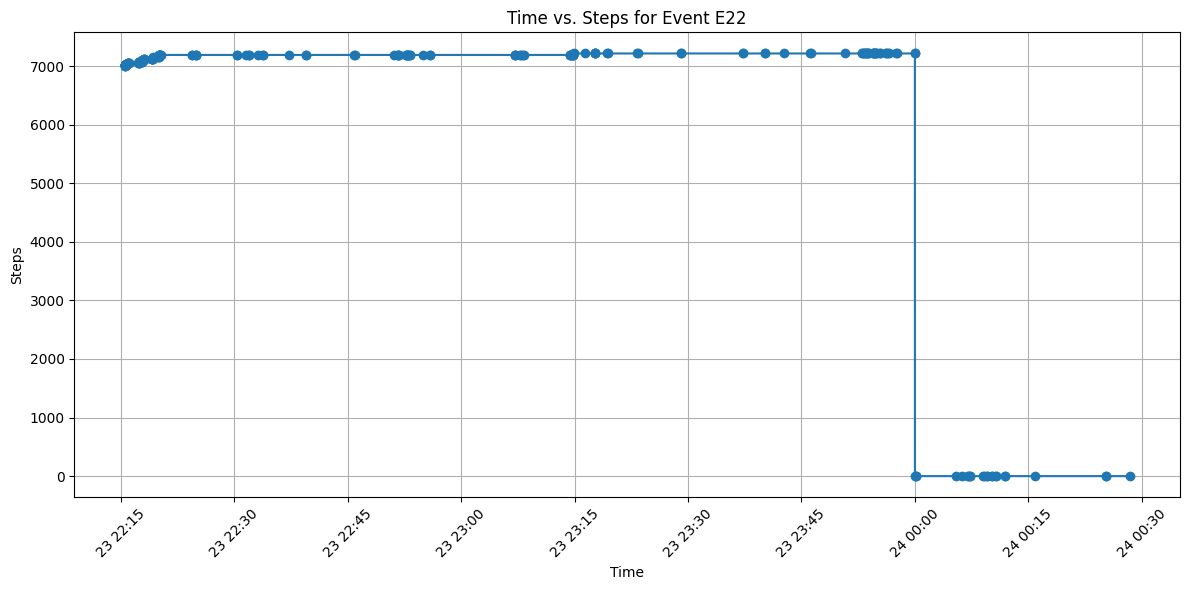

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(step_data['Time'], step_data['Steps'], marker='o', linestyle='-')
plt.title('Time vs. Steps for Event E22')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(step_data[['Time', 'Steps']])

In [30]:
step_per_day=sum(step_data['Steps']/242)
print(step_per_day)
person_total_steps =max(step_data['Steps'])
print(person_total_steps)


6461.409090909094
7214


In [31]:
steps_increase_threshold = 1000
min_duration_minutes = 30

workout_sessions = []
current_session = None

for index, row in step_data.iterrows():
    if row['Steps'] > steps_increase_threshold:
        if current_session is None:
            current_session = {'start_time': row['Time']}
        else:
            current_session['end_time'] = row['Time']
    else:
        if current_session is not None:
            duration = (current_session['end_time'] - current_session['start_time']).total_seconds() / 60
            if duration >= min_duration_minutes:
                workout_sessions.append(current_session)
            current_session = None

if workout_sessions:
    print("Workout sessions:")
    for session in workout_sessions:
        print(f"Start: {session['start_time']} - End: {session['end_time']}")

Workout sessions:
Start: 2017-12-23 22:15:29.635000 - End: 2017-12-24 00:00:00.234000


In [32]:
#Lets analyse the calories

In [33]:
calories_data=df[df['Content'].str.contains('calculateCaloriesWithCache totalCalories', case=False, na=False)]

In [ ]:
calories_data

In [34]:
calories_data['Time'] = pd.to_datetime(step_data['Time'], format='%Y%m%d-%H:%M:%S:%f') 
calories_data['Date'] = calories_data['Time'].dt.date
calories_data['hour'] = calories_data['Time'].dt.hour
calories_data['minute'] = calories_data['Time'].dt.minute
calories_data['second'] = calories_data['Time'].dt.second
calories_data['Calories'] = calories_data['Content'].str.extract(r'(\d+)')
calories_data['Calories'] = calories_data['Calories'].astype(int)

C:\Users\manali\AppData\Local\Temp\ipykernel_10716\464817542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_data['Time'] = pd.to_datetime(step_data['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\manali\AppData\Local\Temp\ipykernel_10716\464817542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_data['Date'] = calories_data['Time'].dt.date
C:\Users\manali\AppData\Local\Temp\ipykernel_10716\464817542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [35]:
calories_data.reset_index(inplace=True)

In [36]:
calories_data

,index,Time,Component,Content,EventId,Date,hour,minute,second,Calories
0,8,2017-12-23 22:15:35.110,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126775,E4,2017-12-23,22.0,15.0,35.0,126775
1,17,2017-12-23 22:15:39.655,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126797,E4,2017-12-23,22.0,15.0,39.0,126797
2,24,2017-12-23 22:15:44.152,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126818,E4,2017-12-23,22.0,15.0,44.0,126818
3,31,2017-12-23 22:15:48.652,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126861,E4,2017-12-23,22.0,15.0,48.0,126861
4,38,2017-12-23 22:15:54.651,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126882,E4,2017-12-23,22.0,15.0,54.0,126882
...,...,...,...,...,...,...,...,...,...,...
236,1927,NaT,Step_ExtSDM,calculateCaloriesWithCache totalCalories=0,E4,NaN,NaN,NaN,NaN,0
237,1937,NaT,Step_ExtSDM,calculateCaloriesWithCache totalCalories=0,E4,NaN,NaN,NaN,NaN,0
238,1953,NaT,Step_ExtSDM,calculateCaloriesWithCache totalCalories=0,E4,NaN,NaN,NaN,NaN,0
239,1959,NaT,Step_ExtSDM,calculateCaloriesWithCache totalCalories=0,E4,NaN,NaN,NaN,NaN,0


In [37]:
max(calories_data['Calories'])

131208

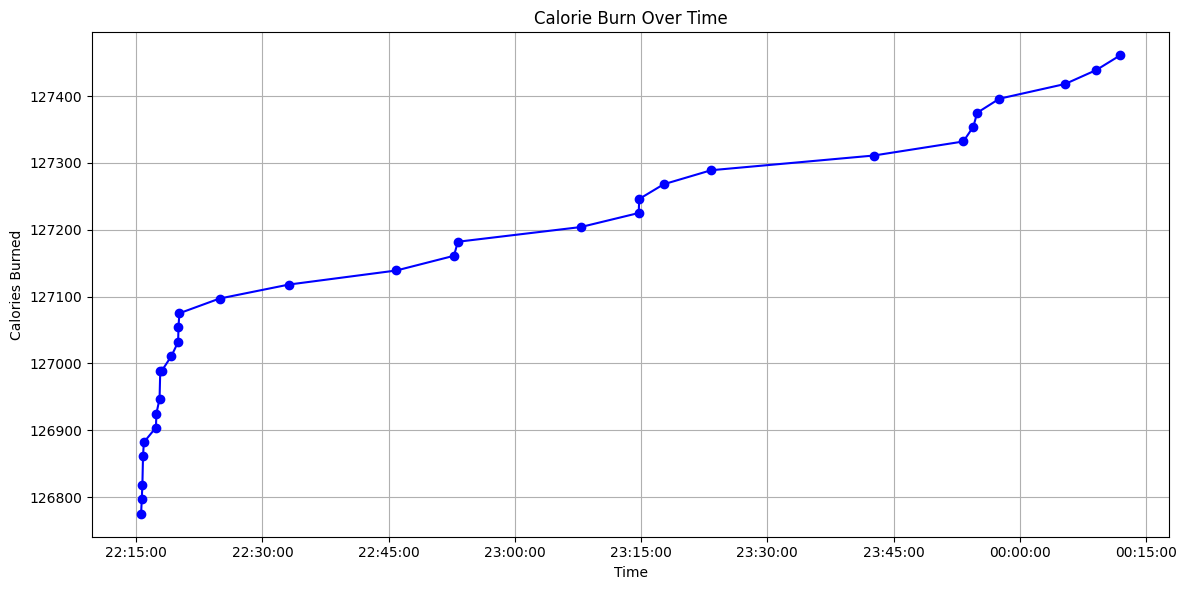

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(calories_data['Time'],calories_data['Calories'], marker='o', linestyle='-', color='b')
plt.title('Calorie Burn Over Time')
plt.xlabel('Time')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

plt.show()

# REPORT

##  Conclusion

From the given observations the event E22 is the data for the steps. 

1) on 23-12-2017(from 10:15PM to 11:57PM) person's total step count = 7214
2) on 24-12-2017(from 00:00AM to 00:29AM) person's total step count = 0
3) Person's average number of steps per day = 6461 (approx)
4) Workout sessions: Start: 2017-12-23 22:15:29.635000 - End: 2017-12-24 00:00:00.234000
5) On 23-12-2017 after 11:14PM there is no change in steps or there isn't any movements so the person might be resting or put their phone on rest


From the given observations the event E4 is the data for calories .

The maximum calories burnt by the person is 131208 which is pratically and theoretically impossible thus
as per analysis these are the cumulative callories that the app/system was keep on adding the calories without deleting the
previous calories burnt.

on 24-12-2017(from 00:00AM to 00:29AM) person's total calories = 0
